In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Dataset 1
np.random.seed(45)
num_samples = 40
x1 = np.random.uniform(-20, 20, num_samples)
X1 = np.vstack((np.ones(num_samples), x1)).T
f_x1 = 100 * x1 + 1
eps1 = np.random.randn(num_samples)
y1 = f_x1 + eps1

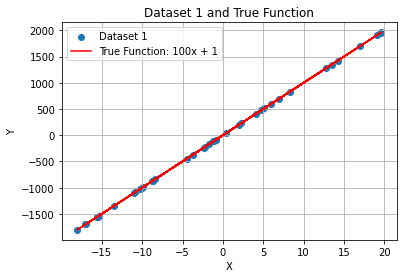

In [281]:
# Plotting
plt.scatter(x1, y1, label='Dataset 1')
plt.plot(x1, f_x1, color='red', label='True Function: 100x + 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 1 and True Function')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Dataset 2
np.random.seed(45)
num_samples = 40
x2 = np.random.uniform(-1, 1, num_samples)
X2 = np.vstack((np.ones(num_samples), x2)).T
f_x2 = 3 * x2 + 4
eps2 = np.random.randn(num_samples)
y2 = f_x2 + eps2

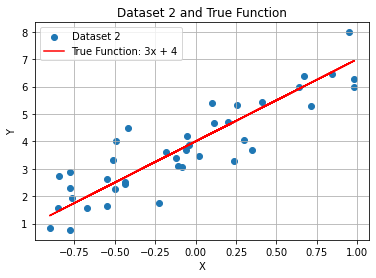

In [282]:
# Plotting
plt.scatter(x2, y2, label='Dataset 2')
plt.plot(x2, f_x2, color='red', label='True Function: 3x + 4')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 2 and True Function')
plt.legend()
plt.grid(True)
plt.show()

## **Full Batch Gradient Descent**

In [131]:
def full_batch_gradient_descent(X, y, learning_rate=0.01, epochs=1000, epsilon=0.001):
    # n = no. of samples
    # m = no. of features
    n, m = X.shape
    theta = np.zeros(m)
    theta_hist = []
    prev_loss = float('inf')
    flag=0
    cost_list=[]
    epoch_list=[]
    for epoch in range(1,epochs+1):
        y_pred = np.dot(X, theta)
        error = y_pred - y
        gradient = np.dot(X.T, error) / num_samples
        greadient = 2 * gradient
        theta -= learning_rate * gradient
        loss = np.mean(np.square(error))
        if epoch%10==0:
            cost_list.append(loss)
            epoch_list.append(epoch)
            theta_hist.append([theta[1],theta[0]])
        if abs(prev_loss - loss) < epsilon and flag==0:
            converge_epoch = epoch
            flag=1
        prev_loss = loss
        
    
    return theta, converge_epoch , epoch_list, cost_list, theta_hist

###  Full batch Gradient descent on Dataset 1

In [132]:
theta_fb1, epochs_fb1, epoch_fb1, cost_fb1, theta_fb1_hist = full_batch_gradient_descent(X1, y1)

In [133]:
print("f_x1 = 100 * x1 + 1")
print("theta1 = ", theta_fb1[1])
print("theta0 = ", theta_fb1[0])
print("convergence epoch = ", epochs_fb1)

f_x1 = 100 * x1 + 1
theta1 =  99.9841217549038
theta0 =  0.9505812210655653
convergence epoch =  237


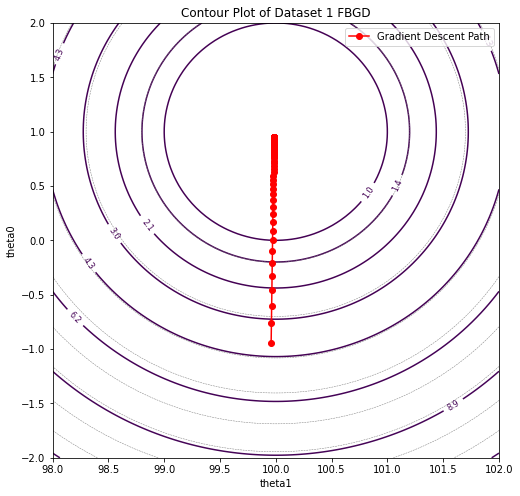

In [62]:
t1 = [sublist[0] for sublist in theta_fb1_hist[1:]]
t0 = [sublist[1] for sublist in theta_fb1_hist[1:]]

# Define the objective function
def objective_function(w, b):
    return (w-100)**2 + (b-1)**2 

# Generate data for contour plot
w_values = np.linspace(98, 102, 100)
b_values = np.linspace(-2, 2, 100)
W, B = np.meshgrid(w_values, b_values)
Z = objective_function(W, B)

# Create contour plot
plt.figure(figsize=(8, 8))
contour = plt.contour(W, B, Z, levels=np.logspace(0, 3, 20), cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)

# Add labels and title
plt.xlabel('theta1')
plt.ylabel('theta0')
plt.title('Contour Plot of Dataset 1 FBGD')

# Add concentric circles and values of w, b going to the center
circle_levels = np.linspace(0, np.max(Z), 10)
plt.contour(W, B, Z, levels=circle_levels, linewidths=0.5, colors='gray', linestyles='dashed')

# Plot the path of gradient descent (example points)
gd_path_w = np.array(t1)
gd_path_b = np.array(t0)
plt.plot(gd_path_w, gd_path_b, marker='o', color='red', label='Gradient Descent Path')

# Display legend
plt.legend()

# Show the plot
plt.show()


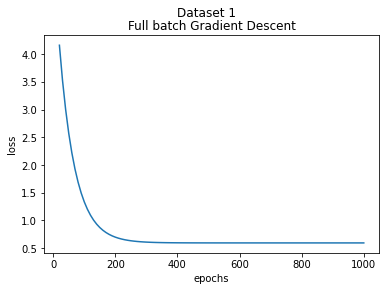

In [63]:
plt.title("Full batch Gradient Descent")
plt.suptitle("Dataset 1")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epoch_fb1[1:], cost_fb1[1:])

### Full batch Gradient descent on Dataset 2

In [64]:
theta_fb2, epochs_fb2, epoch_fb2, cost_fb2, theta_fb2_hist = full_batch_gradient_descent(X2, y2)

In [65]:
print("f_x2 = 3 * x2 + 4")
print("theta1 = ", theta_fb2[1])
print("theta0 = ", theta_fb2[0])
print("convergence epoch = ", epochs_fb2)

f_x2 = 3 * x2 + 4
theta1 =  2.5362700458505376
theta0 =  3.932736941041301
convergence epoch =  481


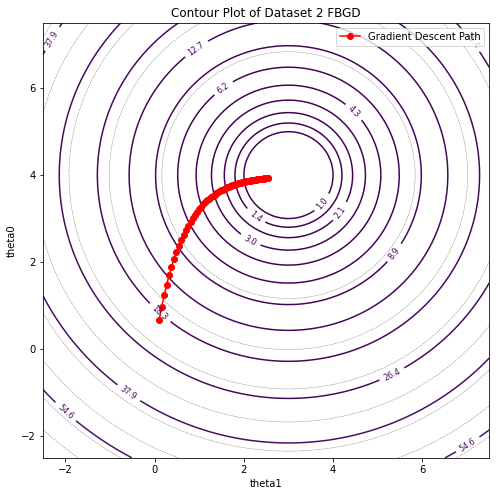

In [66]:
t1 = [sublist[0] for sublist in theta_fb2_hist[1:]]
t0 = [sublist[1] for sublist in theta_fb2_hist[1:]]

# Define the objective function
def objective_function(w, b):
    return (w-3)**2 + (b-4)**2 

# Generate data for contour plot
w_values = np.linspace(-2.5, 7.5, 100)
b_values = np.linspace(-2.5, 7.5, 100)
W, B = np.meshgrid(w_values, b_values)
Z = objective_function(W, B)

# Create contour plot
plt.figure(figsize=(8, 8))
contour = plt.contour(W, B, Z, levels=np.logspace(0, 3, 20), cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)

# Add labels and title
plt.xlabel('theta1')
plt.ylabel('theta0')
plt.title('Contour Plot of Dataset 2 FBGD')

# Add concentric circles and values of w, b going to the center
circle_levels = np.linspace(0, np.max(Z), 10)
plt.contour(W, B, Z, levels=circle_levels, linewidths=0.5, colors='gray', linestyles='dashed')

# Plot the path of gradient descent (example points)
gd_path_w = np.array(t1)
gd_path_b = np.array(t0)
plt.plot(gd_path_w, gd_path_b, marker='o', color='red', label='Gradient Descent Path')

# Display legend
plt.legend()

# Show the plot
plt.show()


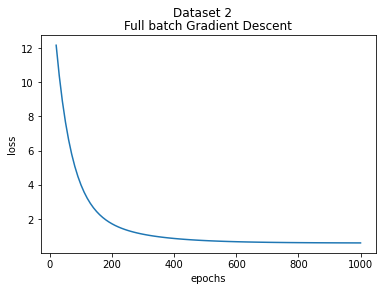

In [67]:
plt.title("Full batch Gradient Descent")
plt.suptitle("Dataset 2")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epoch_fb2[1:], cost_fb2[1:])

## **Stochastic Gradient Descent**

In [155]:
def stochastic_gradient_descent(X, y, learning_rate, epochs=1000, epsilon=0.001):
    # n = no. of samples
    # m = no. of features
    n, m = X.shape
    theta = np.zeros(m)
    prev_loss = float('inf')
    flag=0
    convergence_epoch = 1
    theta_hist = []
    cost_list=[]
    epoch_list=[]
    for epoch in range(1,epochs+1):
        # Shuffling dataset
        shuffle_indices = np.random.permutation(n)
        X_shuffled = X[shuffle_indices]
        y_shuffled = y[shuffle_indices]
        for i in range(n):
            xi = X_shuffled[i:i+1]
            yi = y_shuffled[i:i+1]
            y_pred = np.dot(xi, theta)
            error = y_pred - yi
            gradient = np.dot(xi.T, error)
            theta -= learning_rate * gradient.flatten()
        y_pred = np.dot(X, theta)
        error = y_pred - y
        loss = np.mean(np.square(error))
        cost_list.append(loss)
        epoch_list.append(epoch)
        theta_hist.append([theta[1],theta[0]])
        if abs(prev_loss - loss) < epsilon and flag==0:
            convergence_epoch = epoch
            flag=1
        prev_loss = loss

    if convergence_epoch==1:
        e = []
        for i in range(len(cost_list)-1):
            e.append(abs(cost_list[i]-cost_list[i+1]))
        convergence_epoch = e.index(min(e))

    return theta, convergence_epoch , epoch_list, cost_list, theta_hist

###  Stochastic Gradient descent on Dataset 1

In [156]:
theta_sgd1, epochs_sgd1, epoch_sgd1, cost_sgd1, theta_sgd1_hist = stochastic_gradient_descent(X1, y1,0.005)

In [157]:
print("f_x1 = 100 * x1 + 1")
print("theta1 = ", theta_sgd1[1])
print("theta0 = ", theta_sgd1[0])
print("convergence epoch = ", epochs_sgd1)

f_x1 = 100 * x1 + 1
theta1 =  99.94345611031235
theta0 =  0.9086691448225213
convergence epoch =  392


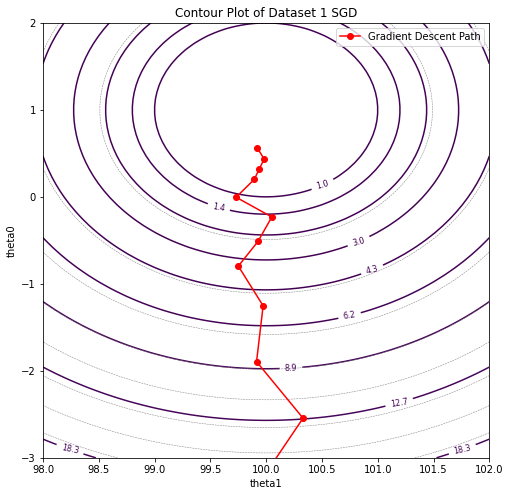

In [153]:
t1 = [sublist[0] for sublist in theta_sgd1_hist[1:]]
t0 = [sublist[1] for sublist in theta_sgd1_hist[1:]]

# Define the objective function
def objective_function(w, b):
    return (w-100)**2 + (b-1)**2  

# Generate data for contour plot
w_values = np.linspace(98, 102, 100)
b_values = np.linspace(-3, 5, 100)
W, B = np.meshgrid(w_values, b_values)
Z = objective_function(W, B)

# Create contour plot
plt.figure(figsize=(8, 8))
contour = plt.contour(W, B, Z, levels=np.logspace(0, 3, 20), cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)

# Add labels and title
plt.xlabel('theta1')
plt.ylabel('theta0')
plt.title('Contour Plot of Dataset 1 SGD')

# Add concentric circles and values of w, b going to the center
circle_levels = np.linspace(0, np.max(Z), 10)
plt.contour(W, B, Z, levels=circle_levels, linewidths=0.5, colors='gray', linestyles='dashed')

# Plot the path of gradient descent (example points)
gd_path_w = np.array(t1)
gd_path_b = np.array(t0)
plt.plot(gd_path_w, gd_path_b, marker='o', color='red', label='Gradient Descent Path')
plt.xlim(98,102)
plt.ylim(-3,2)
# Display legend
plt.legend()
# Show the plot
plt.show()


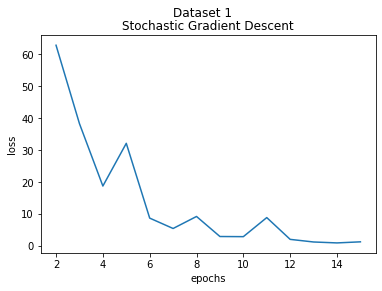

In [154]:
plt.title("Stochastic Gradient Descent")
plt.suptitle("Dataset 1")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epoch_sgd1[1:], cost_sgd1[1:])

In [161]:
convergence_epoch_list=[]
for ind in range(100):
    theta_sgd1, epochs_sgd1, epoch_sgd1, cost_sgd1, theta_sgd1_hist = stochastic_gradient_descent(X1, y1,0.005)
    convergence_epoch_list.append(epochs_sgd1)
avg_epoch_sgd1 = round(sum(convergence_epoch_list)/100)

In [162]:
avg_epoch_sgd1

224

###  Stochastic Gradient descent on Dataset 2

In [256]:
theta_sgd2, epochs_sgd2, epoch_sgd2, cost_sgd2, theta_sgd2_hist = stochastic_gradient_descent(X2, y2,0.03)

In [257]:
print("f_x2 = 3 * x2 + 4")
print("theta1 = ", theta_sgd2[1])
print("theta0 = ", theta_sgd2[0])
print("convergence epoch = ", epochs_sgd2)

f_x2 = 3 * x2 + 4
theta1 =  2.685150428022177
theta0 =  3.972454421385967
convergence epoch =  14


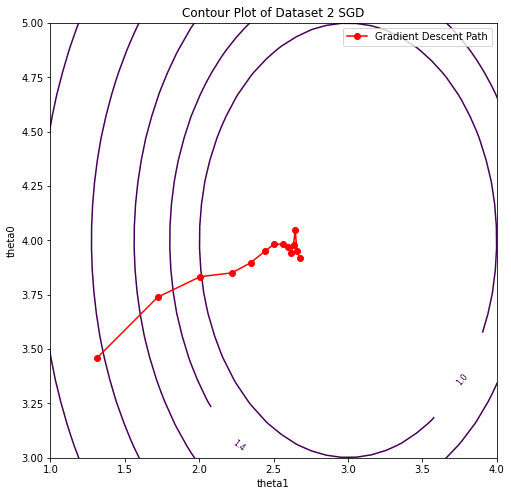

In [92]:
t1_sgd2 = [sublist[0] for sublist in theta_sgd2_hist[1:]]
t0_sgd2 = [sublist[1] for sublist in theta_sgd2_hist[1:]]

# Define the objective function
def objective_function(w, b):
    return (w-3)**2 + (b-4)**2  

# Generate data for contour plot
w_values = np.linspace(-2.5, 7.5, 100)
b_values = np.linspace(-2.5, 7.5, 100)
W, B = np.meshgrid(w_values, b_values)
Z = objective_function(W, B)

# Create contour plot
plt.figure(figsize=(8, 8))
contour = plt.contour(W, B, Z, levels=np.logspace(0, 3, 20), cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)

# Add labels and title
plt.xlabel('theta1')
plt.ylabel('theta0')
plt.title('Contour Plot of Dataset 2 SGD')

# Add concentric circles and values of w, b going to the center
circle_levels = np.linspace(0, np.max(Z), 10)
plt.contour(W, B, Z, levels=circle_levels, linewidths=0.5, colors='gray', linestyles='dashed')

# Plot the path of gradient descent (example points)

gd_path_w = np.array(t1_sgd2)
gd_path_b = np.array(t0_sgd2)
plt.plot(gd_path_w, gd_path_b, marker='o', color='red', label='Gradient Descent Path')
plt.xlim(1,4)
plt.ylim(3,5)
# Display legend
plt.legend()
# Show the plot
plt.show()


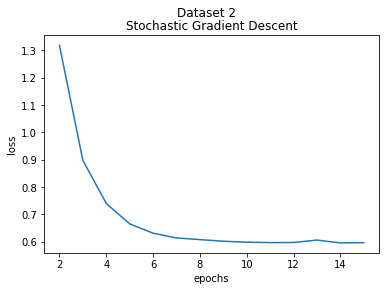

In [91]:
plt.title("Stochastic Gradient Descent")
plt.suptitle("Dataset 2")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epoch_sgd2[1:], cost_sgd2[1:])

In [168]:
convergence_epoch_list=[]
for ind in range(100):
    theta_sgd2, epochs_sgd2, epoch_sgd2, cost_sgd2, theta_sgd2_hist = stochastic_gradient_descent(X1, y1,0.005)
    convergence_epoch_list.append(epochs_sgd2)
avg_epoch_sgd2 = round(sum(convergence_epoch_list)/100)

In [169]:
avg_epoch_sgd2

231

##  **Full batch Gradient descent with Momentum**

In [14]:
def full_batch_gradient_descent_momentum(X, y, momentum, learning_rate, epochs=1000, epsilon=0.001):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)
    theta_hist = []
    prev_loss = float('inf')
    flag = 0
    cost_list = []
    epoch_list = []
    converge_epoch = 1
    change = np.zeros(num_features)  # Initialize velocity to zero

    for epoch in range(1, epochs + 1):
        y_pred = np.dot(X, theta)
        error = y_pred - y
        gradient = np.dot(X.T, error) / num_samples
        gradient = 2 * gradient  
        change = momentum * change + learning_rate * gradient
        theta -= change

        loss = np.mean(np.square(error))
        if epoch % 10 == 0:
            cost_list.append(loss)
            epoch_list.append(epoch)
            theta_hist.append([theta[1], theta[0]])

        if (abs(prev_loss - loss) < epsilon) and flag == 0:
            converge_epoch = epoch
            flag = 1 

        prev_loss = loss

    return theta, converge_epoch, epoch_list, cost_list, theta_hist

###  Full batch Gradient descent with momentum on Dataset 1 

In [15]:
theta_fbm1, epochs_fbm1, epoch_fbm1, cost_fbm1, theta_hist_fbm1 = full_batch_gradient_descent_momentum(X1, y1, 0.9, 0.0009)

In [16]:
print("f_x1 = 100 * x1 + 1")
print("theta1 = ", theta_fbm1[1])
print("theta0 = ", theta_fbm1[0])
print("convergence epoch = ", epochs_fbm1)

f_x1 = 100 * x1 + 1
theta1 =  99.9841234462898
theta0 =  0.9507064016880229
convergence epoch =  177


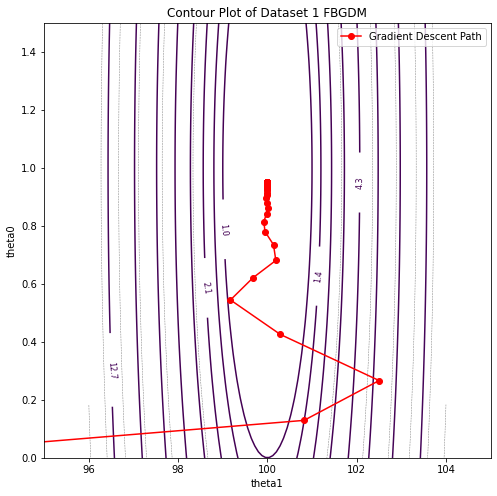

In [17]:
t1_fbm1 = [sublist[0] for sublist in theta_hist_fbm1[:]]
t0_fbm1 = [sublist[1] for sublist in theta_hist_fbm1[:]]

# Define the objective function
def objective_function(w, b):
    return (w-100)**2 + (b-1)**2 

# Generate data for contour plot
w_values = np.linspace(96, 104, 100)
b_values = np.linspace(-2, 2, 100)
W, B = np.meshgrid(w_values, b_values)
Z = objective_function(W, B)

# Create contour plot
plt.figure(figsize=(8, 8))
contour = plt.contour(W, B, Z, levels=np.logspace(0, 3, 20), cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)

# Add labels and title
plt.xlabel('theta1')
plt.ylabel('theta0')
plt.title('Contour Plot of Dataset 1 FBGDM')

# Add concentric circles and values of w, b going to the center
circle_levels = np.linspace(0, np.max(Z), 10)
plt.contour(W, B, Z, levels=circle_levels, linewidths=0.5, colors='gray', linestyles='dashed')

# Plot the path of gradient descent (example points)
gd_path_w = np.array(t1_fbm1)
gd_path_b = np.array(t0_fbm1)
plt.plot(gd_path_w, gd_path_b, marker='o', color='red', label='Gradient Descent Path')
plt.xlim(95,105)
plt.ylim(0,1.5)
# Display legend
plt.legend()

# Show the plot
plt.show()


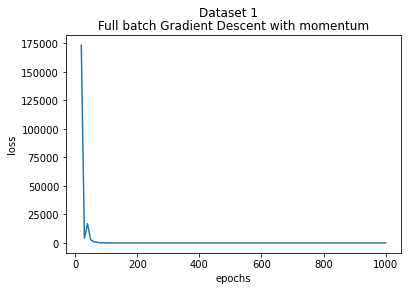

In [18]:
plt.title("Full batch Gradient Descent with momentum")
plt.suptitle("Dataset 1")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epoch_fbm1[1:], cost_fbm1[1:])

###  Full batch Gradient descent with momentum on Dataset 2

In [21]:
theta_fbm2, epochs_fbm2, epoch_fbm2, cost_fbm2, theta_hist_fbm2 = full_batch_gradient_descent_momentum(X2, y2, 0.9, 0.005)

In [22]:
print("f_x2 = 3 * x2 + 4")
print("theta1 = ", theta_fbm2[1])
print("theta0 = ", theta_fbm2[0])
print("convergence epoch = ", epochs_fbm2)

f_x2 = 3 * x2 + 4
theta1 =  2.6824689259670556
theta0 =  3.9507064023194536
convergence epoch =  82


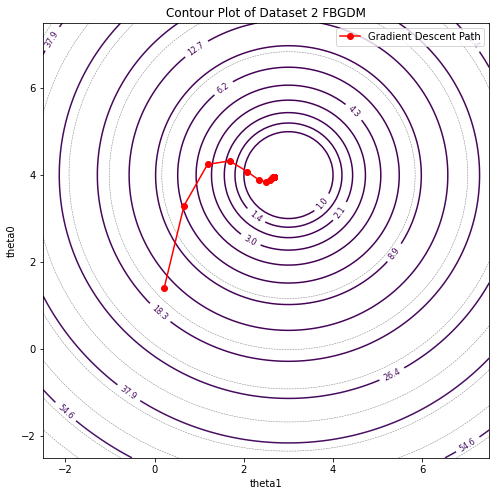

In [23]:
t1_fbm2 = [sublist[0] for sublist in theta_hist_fbm2[:]]
t0_fbm2 = [sublist[1] for sublist in theta_hist_fbm2[:]]

# Define the objective function
def objective_function(w, b):
    return (w-3)**2 + (b-4)**2  
# Generate data for contour plot
w_values = np.linspace(-2.5, 7.5, 100)
b_values = np.linspace(-2.5, 7.5, 100)
W, B = np.meshgrid(w_values, b_values)
Z = objective_function(W, B)

# Create contour plot
plt.figure(figsize=(8, 8))
contour = plt.contour(W, B, Z, levels=np.logspace(0, 3, 20), cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)

# Add labels and title
plt.xlabel('theta1')
plt.ylabel('theta0')
plt.title('Contour Plot of Dataset 2 FBGDM')

# Add concentric circles and values of w, b going to the center
circle_levels = np.linspace(0, np.max(Z), 10)
plt.contour(W, B, Z, levels=circle_levels, linewidths=0.5, colors='gray', linestyles='dashed')

# Plot the path of gradient descent (example points)
gd_path_w = np.array(t1_fbm2)
gd_path_b = np.array(t0_fbm2)
plt.plot(gd_path_w, gd_path_b, marker='o', color='red', label='Gradient Descent Path')

# Display legend
plt.legend()

# Show the plot
plt.show()


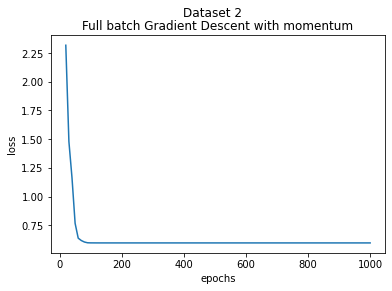

In [24]:
plt.title("Full batch Gradient Descent with momentum")
plt.suptitle("Dataset 2")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epoch_fbm2[1:], cost_fbm2[1:])

##  **Stochastic Gradient descent with Momentum**

In [32]:
def stochastic_gradient_descent_momentum(X, y,momentum, learning_rate,  epochs=15, epsilon=0.001):
    # n = no. of samples
    # m = no. of features
    n, m = X.shape
    theta = np.zeros(m)
    prev_loss = float('inf')
    flag=0
    convergence_epoch = 1
    theta_hist = []
    cost_list=[]
    epoch_list=[]
    # Initialize the momentum term
    change = np.zeros(m)
    
    for epoch in range(1, epochs+1):
        # Shuffling dataset
        shuffle_indices = np.random.permutation(n)
        X_shuffled = X[shuffle_indices]
        y_shuffled = y[shuffle_indices]
        
        for i in range(n):
            xi = X_shuffled[i:i+1]
            yi = y_shuffled[i:i+1]
            
            y_pred = np.dot(xi, theta)
            error = y_pred - yi
            gradient = np.dot(xi.T, error)
            
            # Update velocity with momentum
            change = momentum * change + learning_rate * gradient.flatten()
            
            # Update theta using momentum
            theta -= change
            
        y_pred = np.dot(X_shuffled, theta)
        error = y_pred - y_shuffled
        loss = np.mean(np.square(error))
        cost_list.append(loss)
        epoch_list.append(epoch)
        theta_hist.append([theta[1], theta[0]])
        if (abs(prev_loss - loss) < epsilon) and (flag == 0):
            convergence_epoch = epoch
            flag = 1
            
        prev_loss = loss
    if convergence_epoch==1:
        e = []
        for i in range(len(cost_list)-1):
            e.append(abs(cost_list[i]-cost_list[i+1]))
        convergence_epoch = e.index(min(e))
    return theta, convergence_epoch, epoch_list, cost_list, theta_hist


###  Stochastic Gradient descent with momentum on Dataset 1

In [33]:
theta_sgdm1, epochs_sgdm1, epoch_sgdm1, cost_sgdm1, theta_hist_sgdm1 = stochastic_gradient_descent_momentum(X1, y1, 0.02, 0.008)

In [263]:
print("f_x1 = 100 * x1 + 1")
print("theta1 = ", theta_sgdm1[1])
print("theta0 = ", theta_sgdm1[0])
print("convergence epoch = ", epochs_sgdm1)

f_x1 = 100 * x1 + 1
theta1 =  99.80301623073674
theta0 =  0.9654677558591698
convergence epoch =  155


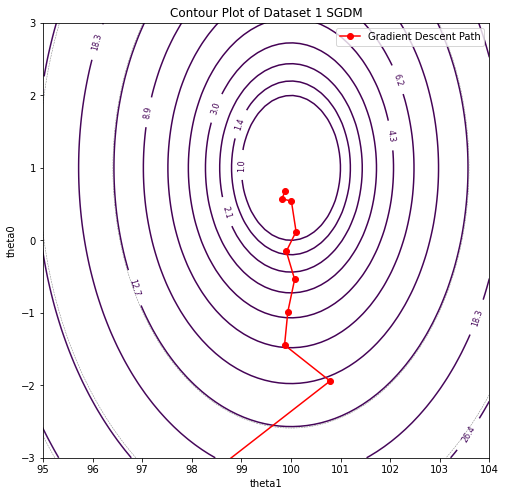

In [34]:
t1_sgdm1 = [sublist[0] for sublist in theta_hist_sgdm1[:]]
t0_sgdm1 = [sublist[1] for sublist in theta_hist_sgdm1[:]]

# Define the objective function
def objective_function(w, b):
    return (w-100)**2 + (b-1)**2 

# Generate data for contour plot
w_values = np.linspace(90, 104, 100)
b_values = np.linspace(-3, 5, 100)
W, B = np.meshgrid(w_values, b_values)
Z = objective_function(W, B)

# Create contour plot
plt.figure(figsize=(8, 8))
contour = plt.contour(W, B, Z, levels=np.logspace(0, 3, 20), cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)

# Add labels and title
plt.xlabel('theta1')
plt.ylabel('theta0')
plt.title('Contour Plot of Dataset 1 SGDM')

# Add concentric circles and values of w, b going to the center
circle_levels = np.linspace(0, np.max(Z), 10)
plt.contour(W, B, Z, levels=circle_levels, linewidths=0.5, colors='gray', linestyles='dashed')

# Plot the path of gradient descent (example points)
gd_path_w = np.array(t1_sgdm1)
gd_path_b = np.array(t0_sgdm1)
plt.plot(gd_path_w, gd_path_b, marker='o', color='red', label='Gradient Descent Path')
plt.xlim(95,104)
plt.ylim(-3,3)
# Display legend
plt.legend()

# Show the plot
plt.show()


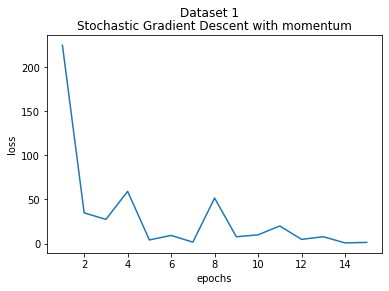

In [117]:
plt.title("Stochastic Gradient Descent with momentum")
plt.suptitle("Dataset 1")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epoch_sgdm1[:], cost_sgdm1[:])

In [260]:
convergence_epoch_list=[]
for ind in range(1):
    theta_sgdm1, epochs_sgdm1, epoch_sgdm1, cost_sgdm1, theta_hist_sgdm1 = stochastic_gradient_descent_momentum(X1, y1, 0.02, 0.008)
    convergence_epoch_list.append(epochs_sgdm1)
avg_epoch_sgdm1 = round(sum(convergence_epoch_list)/1)

In [261]:
avg_epoch_sgdm1

102

###  Stochastic Gradient descent with momentum on Dataset 2

In [177]:
theta_sgdm2, epochs_sgdm2, epoch_sgdm2, cost_sgdm2, theta_hist_sgdm2 = stochastic_gradient_descent_momentum(X2, y2, 0.2, 0.01)

In [178]:
print("f_x2 = 3 * x2 + 4")
print("theta1 = ", theta_sgdm2[1])
print("theta0 = ", theta_sgdm2[0])
print("convergence epoch = ", epochs_sgdm2)

f_x2 = 3 * x2 + 4
theta1 =  2.6850211020396264
theta0 =  3.9513497322446374
convergence epoch =  22


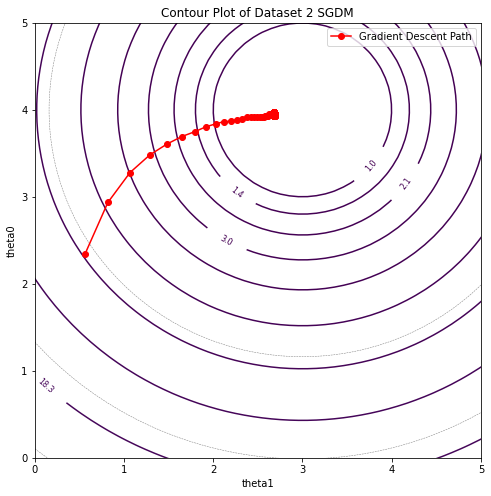

In [266]:
t1_sgdm2 = [sublist[0] for sublist in theta_hist_sgdm2[1:]]
t0_sgdm2 = [sublist[1] for sublist in theta_hist_sgdm2[1:]]

# Define the objective function
def objective_function(w, b):
    return (w-3)**2 + (b-4)**2  

# Generate data for contour plot
w_values = np.linspace(-2.5, 7.5, 100)
b_values = np.linspace(-2.5, 7.5, 100)
W, B = np.meshgrid(w_values, b_values)
Z = objective_function(W, B)

# Create contour plot
plt.figure(figsize=(8, 8))
contour = plt.contour(W, B, Z, levels=np.logspace(0, 3, 20), cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)

# Add labels and title
plt.xlabel('theta1')
plt.ylabel('theta0')
plt.title('Contour Plot of Dataset 2 SGDM')

# Add concentric circles and values of w, b going to the center
circle_levels = np.linspace(0, np.max(Z), 10)
plt.contour(W, B, Z, levels=circle_levels, linewidths=0.5, colors='gray', linestyles='dashed')

# Plot the path of gradient descent (example points)

gd_path_w = np.array(t1_sgdm2)
gd_path_b = np.array(t0_sgdm2)
plt.plot(gd_path_w, gd_path_b, marker='o', color='red', label='Gradient Descent Path')
plt.xlim(0,5)
plt.ylim(0,5)
# Display legend
plt.legend()
# Show the plot
plt.show()


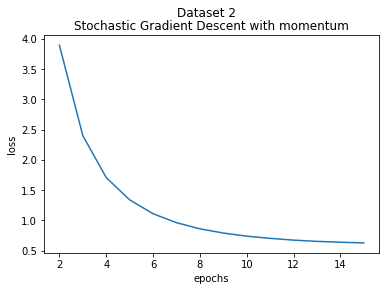

In [123]:
plt.title("Stochastic Gradient Descent with momentum")
plt.suptitle("Dataset 2")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epoch_sgdm2[1:], cost_sgdm2[1:])

In [179]:
convergence_epoch_list=[]
for ind in range(100):
    theta_sgdm2, epochs_sgdm2, epoch_sgdm2, cost_sgdm2, theta_hist_sgdm2 = stochastic_gradient_descent_momentum(X2, y2, 0.2, 0.01)
    convergence_epoch_list.append(epochs_sgdm2)
avg_epoch_sgdm2 = round(sum(convergence_epoch_list)/100)

In [180]:
avg_epoch_sgdm2

23

In [264]:
data = {
    'Method': ['Full batch Dataset-1','Full batch Dataset-2', 'Stochastic Dataset-1', 'Stochastic Dataset-2','Full batch momentum Dataset-1','Full batch momentum Dataset-2', 'Stochastic momentum Dataset-1', 'Stochastic momentum Dataset-2'],
    'Theta0': [theta_fb1[0],theta_fb2[0],theta_sgd1[0],theta_sgd2[0],theta_fbm1[0],theta_fbm2[0],theta_sgdm1[0],theta_sgdm2[0]],
    'Theta1': [theta_fb1[1],theta_fb2[1],theta_sgd1[1],theta_sgd2[1],theta_fbm1[1],theta_fbm2[1],theta_sgdm1[1],theta_sgdm2[1]],
    'Convergence Epoch': [epochs_fb1, epochs_fb2, avg_epoch_sgd1, avg_epoch_sgd2,epochs_fbm1, epochs_fbm2, avg_epoch_sgdm1, avg_epoch_sgdm2]
}

# Create a DataFrame
df = pd.DataFrame(data)

In [265]:
# Separate into datasets
df_dataset1 = df[df['Method'].str.contains('Dataset-1')]
df_dataset2 = df[df['Method'].str.contains('Dataset-2')]

# Display the separate DataFrames
print("Dataset 1:")
print(df_dataset1)

print("\nDataset 2:")
print(df_dataset2)

Dataset 1:
                          Method    Theta0     Theta1  Convergence Epoch
0           Full batch Dataset-1  0.950581  99.984122                237
2           Stochastic Dataset-1  0.920285  99.996843                224
4  Full batch momentum Dataset-1  0.890884  99.976943                177
6  Stochastic momentum Dataset-1  0.965468  99.803016                102

Dataset 2:
                          Method    Theta0    Theta1  Convergence Epoch
1           Full batch Dataset-2  3.932737  2.536270                481
3           Stochastic Dataset-2  3.972454  2.685150                231
5  Full batch momentum Dataset-2  3.892256  2.595489                 82
7  Stochastic momentum Dataset-2  3.950858  2.686862                 23
